###Head

In [80]:
!head /resources/data_weather0.csv

In [5]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [125]:
#-*- coding:utf-8 -*-
#from future import unicode_literals
import pandas as pd
import numpy as np

#Create Shema
sqlContext = SQLContext(sc)
colnames = ["CITY", 
            "NEW_HOUSING_CHAIN", 
            "NEW_HOUSING_YOY", 
            "NEW_HOUSING_FIXED",
            "NEW_COMMERCIAL_CHAIN",
            "NEW_COMMERCIAL_YOY", 
            "NEW_COMMERCIAL_FIXED",
            "OLD_HOUSING_CHAIN", 
            "OLD_HOUSING_YOY", 
            "OLD_HOUSING_FIXED",
            "YEAR",
            "MONTH"]

#IImport CSV
pdf = pd.read_csv("/resources/houseprice0.csv", header=0, names=colnames,index_col=False,encoding="utf-8")
#pdf['YEAR_MONTH'] = pdf.YEAR.apply(str)+pdf.MONTH.apply(str)
print "前四行数据:"
#pdf.head()
pdf[pdf["CITY"]=="北京市"]


,CITY,NEW_HOUSING_CHAIN,NEW_HOUSING_YOY,NEW_HOUSING_FIXED,NEW_COMMERCIAL_CHAIN,NEW_COMMERCIAL_YOY,NEW_COMMERCIAL_FIXED,OLD_HOUSING_CHAIN,OLD_HOUSING_YOY,OLD_HOUSING_FIXED,YEAR,MONTH
0,北京市,100.1,106.4,122.6,100.1,108.0,129.3,98.7,104.7,117.6,2014,6
70,北京市,99.0,104.0,121.4,98.7,104.9,127.6,99.2,102.4,116.6,2014,7
140,北京市,99.1,102.1,120.3,98.8,102.6,126.2,99.1,100.4,115.7,2014,8
210,北京市,99.3,100.4,119.4,99.1,100.4,125.0,98.6,97.6,114.0,2014,9
280,北京市,98.9,98.7,118.1,98.7,98.3,123.4,100.3,96.8,114.3,2014,10
350,北京市,99.8,97.9,117.9,99.7,97.4,123.0,100.7,96.3,115.1,2014,11
420,北京市,99.8,97.3,117.7,99.8,96.6,122.7,100.2,95.9,115.3,2014,12
490,北京市,99.9,96.8,117.6,99.9,96.0,122.6,100.0,96.0,115.3,2015,1
560,北京市,99.8,96.4,117.4,99.7,95.5,122.3,99.9,95.9,115.2,2015,2
630,北京市,100.3,96.3,117.7,100.3,95.3,122.7,100.5,96.2,115.8,2015,3


In [69]:
colnames = ["CITY", 
            "CONCUMPTION", 
            "FOOD", 
            "GRAIN", 
            "MEAT", 
            "EGG" ,
            "SEAFOOD",
            "VEGE",
            "FRUIT",
            "CIGARETTE_WINE",
            "CLOTHING",
            "HOUSEHOLD",
            "MEDICINE",
            "TRANSPORTATION_COMMUNICATION",
            "ENTERTAINMENT",
            "DWELLING",
            "YEAR",
            "MONTH"]

cdf = pd.read_csv("/resources/ClassifiedConsumption.csv", names = colnames,header=None,index_col=False,encoding="utf-8")

cdf[cdf["CITY"]=="北京市"]
#合并与气象数据
#pdf = pd.merge(pdf, stations, on='ID', how='left') #Merge

#从天气台的名字, 删除 "_GSN_"
#pdf.NAME = pdf.NAME.str.replace('_GSN', '')

print "前5行数据:"

cdf.head(20)

,CITY,CONCUMPTION,FOOD,GRAIN,MEAT,EGG,SEAFOOD,VEGE,FRUIT,CIGARETTE_WINE,CLOTHING,HOUSEHOLD,MEDICINE,TRANSPORTATION_COMMUNICATION,ENTERTAINMENT,DWELLING,YEAR,MONTH
0,﻿全国,101.4,101.9,102.1,103.6,88.7,101.9,111.4,91.2,103.5,102.9,101.0,101.9,98.5,101.7,100.8,2015,6
1,全国,101.2,101.6,102.4,103.1,86.8,100.9,106.5,96.8,101.7,102.8,101.0,101.8,98.7,101.7,100.7,2015,5
2,全国,101.5,102.7,102.7,105.0,96.3,101.1,107.2,101.5,99.5,102.9,101.1,101.8,98.4,101.6,100.6,2015,4
3,北京市,102.0,101.9,101.2,102.4,95.6,101.8,107.8,95.5,100.2,104.3,100.4,100.0,103.0,102.0,101.8,2015,4
4,天津市,102.0,102.5,103.0,103.6,92.0,96.8,108.2,108.4,99.6,103.5,100.0,99.8,96.9,106.8,102.3,2015,4
5,河北省,100.8,101.4,102.4,103.4,90.2,99.9,108.0,98.9,98.5,102.7,101.0,102.0,98.2,101.2,99.7,2015,4
6,山西省,100.6,101.1,102.3,105.8,86.2,104.4,104.2,97.3,99.1,102.3,99.9,101.3,97.4,101.5,100.0,2015,4
7,内蒙古自治区,101.3,102.4,102.9,101.9,96.7,104.5,105.0,104.2,100.9,102.8,101.1,101.8,97.8,101.1,99.7,2015,4
8,辽宁省,101.3,102.9,102.9,104.8,90.5,101.5,110.5,105.7,100.1,101.5,100.4,101.1,98.7,100.9,100.3,2015,4
9,吉林省,101.8,103.0,102.3,105.3,90.8,105.8,111.9,101.9,100.5,103.0,100.2,102.2,98.8,99.8,101.9,2015,4


In [127]:
import matplotlib.pyplot as plt
import numpy as np

print "按月份住房价格（北京，天津，上海） \n"
print "(前8行)"

#Limit data to 2005-2014, Precipitation, and three cities
three_cities = pdf[(pdf.CITY=="北京市") | (pdf.CITY=="天津市")| (pdf.CITY=="上海市")]

three_cities[pdf.CITY=="北京市"]


#.sort("YEAR","MONTH", "NAME") 

#three_cities\
#.select("MONTH", "NAME", "NEW_HOUSING_FIXED")\
#.show(8)

,CITY,NEW_HOUSING_CHAIN,NEW_HOUSING_YOY,NEW_HOUSING_FIXED,NEW_COMMERCIAL_CHAIN,NEW_COMMERCIAL_YOY,NEW_COMMERCIAL_FIXED,OLD_HOUSING_CHAIN,OLD_HOUSING_YOY,OLD_HOUSING_FIXED,YEAR,MONTH
0,北京市,100.1,106.4,122.6,100.1,108.0,129.3,98.7,104.7,117.6,2014,6
70,北京市,99.0,104.0,121.4,98.7,104.9,127.6,99.2,102.4,116.6,2014,7
140,北京市,99.1,102.1,120.3,98.8,102.6,126.2,99.1,100.4,115.7,2014,8
210,北京市,99.3,100.4,119.4,99.1,100.4,125.0,98.6,97.6,114.0,2014,9
280,北京市,98.9,98.7,118.1,98.7,98.3,123.4,100.3,96.8,114.3,2014,10
350,北京市,99.8,97.9,117.9,99.7,97.4,123.0,100.7,96.3,115.1,2014,11
420,北京市,99.8,97.3,117.7,99.8,96.6,122.7,100.2,95.9,115.3,2014,12
490,北京市,99.9,96.8,117.6,99.9,96.0,122.6,100.0,96.0,115.3,2015,1
560,北京市,99.8,96.4,117.4,99.7,95.5,122.3,99.9,95.9,115.2,2015,2
630,北京市,100.3,96.3,117.7,100.3,95.3,122.7,100.5,96.2,115.8,2015,3


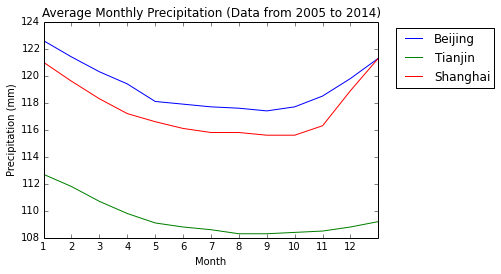

In [92]:
%matplotlib inline
plt.gcf().subplots_adjust(bottom=0.15)

city_list = ["北京市","天津市", "上海市"]

#three_cities_pdf = three_cities.toPandas()

for city in city_list:
    plt.plot(range(1,14),three_cities[three_cities["CITY"] == city]["NEW_HOUSING_FIXED"])
#plt.plot(range(1,14),three_cities[three_cities["CITY"] == "上海市"]["NEW_HOUSING_FIXED"])
       
plt.legend([u"Beijing",u"Tianjin", u"Shanghai"], loc='upper center', bbox_to_anchor=(1.2, 1))
plt.title("Average Monthly Precipitation (Data from 2005 to 2014)")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Month")
plt.xlim([1,13])
plt.xticks(range(1,13),range(1,13))

plt.show()

In [1]:
!head /resources/houseprice.csv

In [129]:
colnames = ["CITY", 
            "INDUSTRY_IN",
            "INDUSTRY_OUT",
            "YEAR",
            "MONTH"]

idf = pd.read_csv("/resources/industryproduce.csv", names = colnames,header=0,index_col=False,encoding="utf-8")
#print "%d" % len(idf[(idf.YEAR==2015) & (idf.MONTH==6)])
#, len(pdf[pdf.YEAR=='2015'&pdf.MONTH=="6"])
idf[(idf.YEAR==2015) & (idf.MONTH==6)]

,CITY,INDUSTRY_IN,INDUSTRY_OUT,YEAR,MONTH
0,全国,95.2,94.4,2015,6
1,北京市,97.2,94.1,2015,6
2,天津市,90.6,92.9,2015,6
3,河北省,89.4,90.8,2015,6
4,山西省,87.9,93.6,2015,6
5,内蒙古自治区,94.1,96.0,2015,6
6,辽宁省,94.5,93.8,2015,6
7,吉林省,95.6,97.0,2015,6
8,黑龙江省,87.7,88.6,2015,6
9,上海市,96.6,91.5,2015,6


In [130]:
p_idf = pd.merge(pdf, idf, on=["CITY","YEAR","MONTH"], how='left') #Merge

bj_df = p_idf[p_idf.CITY=="北京市"]



In [109]:
bj_df.NEW_HOUSING_FIXED.corr(bj_df.INDUSTRY_IN, method='pearson', min_periods=1)

0.29763814382423764

In [110]:
bj_df.corr(method='pearson', min_periods=1)

,NEW_HOUSING_CHAIN,NEW_HOUSING_YOY,NEW_HOUSING_FIXED,NEW_COMMERCIAL_CHAIN,NEW_COMMERCIAL_YOY,NEW_COMMERCIAL_FIXED,OLD_HOUSING_CHAIN,OLD_HOUSING_YOY,OLD_HOUSING_FIXED,YEAR,MONTH,INDUSTRY_IN,INDUSTRY_OUT
NEW_HOUSING_CHAIN,1.000000,-0.347040,0.109978,0.998652,-0.343358,0.087552,0.785470,0.446444,0.821098,0.735667,-0.414391,-0.756091,-0.695198
NEW_HOUSING_YOY,-0.347040,1.000000,0.863592,-0.356063,0.999948,0.875477,-0.524986,0.583002,-0.002854,-0.626015,0.247146,0.657688,0.847195
NEW_HOUSING_FIXED,0.109978,0.863592,1.000000,0.100531,0.863983,0.999533,-0.108695,0.906266,0.491364,-0.272768,0.077227,0.297638,0.551654
NEW_COMMERCIAL_CHAIN,0.998652,-0.356063,0.100531,1.000000,-0.352433,0.078530,0.796580,0.442719,0.823725,0.730069,-0.399971,-0.745586,-0.697772
NEW_COMMERCIAL_YOY,-0.343358,0.999948,0.863983,-0.352433,1.000000,0.875836,-0.523295,0.584201,-0.000967,-0.624567,0.245709,0.656885,0.845412
NEW_COMMERCIAL_FIXED,0.087552,0.875477,0.999533,0.078530,0.875836,1.000000,-0.129334,0.897331,0.471317,-0.292839,0.088204,0.318179,0.570152
OLD_HOUSING_CHAIN,0.785470,-0.524986,-0.108695,0.796580,-0.523295,-0.129334,1.000000,0.281005,0.739225,0.632202,-0.196885,-0.654751,-0.669265
OLD_HOUSING_YOY,0.446444,0.583002,0.906266,0.442719,0.584201,0.897331,0.281005,1.000000,0.808353,0.050041,-0.051848,-0.026792,0.203658
OLD_HOUSING_FIXED,0.821098,-0.002854,0.491364,0.823725,-0.000967,0.471317,0.739225,0.808353,1.000000,0.498692,-0.217804,-0.493736,-0.358726
YEAR,0.735667,-0.626015,-0.272768,0.730069,-0.624567,-0.292839,0.632202,0.050041,0.498692,1.000000,-0.826033,-0.946951,-0.912727


In [2]:
!head /resources/data_weather.csv

,ID,DATE,ELEMENT,VALUE1
0,CHM00050953,20050101,TMAX,-13.0
1,CHM00050953,20050101,TMIN,-24.0
2,CHM00050953,20050101,PRCP,0.0
3,CHM00050953,20050101,TAVG,-19.0
4,CHM00050953,20050102,TMAX,-6.0
5,CHM00050953,20050102,TMIN,-16.3
6,CHM00050953,20050102,PRCP,0.0
7,CHM00050953,20050102,TAVG,-10.5
8,CHM00050953,20050103,TMAX,-7.4


In [112]:
p_cidf = pd.merge(p_idf, cdf, on=["CITY","YEAR","MONTH"], how='left') #Merge

bk_df = p_cidf[p_idf.CITY=="北京市"]

print "前5行数据:"

pdf.head()

,CITY,NEW_HOUSING_CHAIN,NEW_HOUSING_YOY,NEW_HOUSING_FIXED,NEW_COMMERCIAL_CHAIN,NEW_COMMERCIAL_YOY,NEW_COMMERCIAL_FIXED,OLD_HOUSING_CHAIN,OLD_HOUSING_YOY,OLD_HOUSING_FIXED,YEAR,MONTH
0,北京市,100.1,106.4,122.6,100.1,108.0,129.3,98.7,104.7,117.6,2014,6
1,天津市,99.5,103.3,112.7,99.5,103.7,114.4,100.0,103.9,108.7,2014,6
2,石家庄市,100.0,104.9,120.7,100.0,105.0,121.2,100.1,102.4,101.7,2014,6
3,太原市,99.6,105.9,116.1,99.6,106.1,116.7,100.1,102.7,116.7,2014,6
4,呼和浩特市,100.2,106.4,116.3,100.2,106.6,116.8,99.6,101.2,107.2,2014,6


In [113]:
bk_df.corr(method='pearson', min_periods=1)

,NEW_HOUSING_CHAIN,NEW_HOUSING_YOY,NEW_HOUSING_FIXED,NEW_COMMERCIAL_CHAIN,NEW_COMMERCIAL_YOY,NEW_COMMERCIAL_FIXED,OLD_HOUSING_CHAIN,OLD_HOUSING_YOY,OLD_HOUSING_FIXED,YEAR,MONTH,INDUSTRY_IN,INDUSTRY_OUT,CONCUMPTION,FOOD,GRAIN,MEAT,EGG,SEAFOOD,VEGE,
NEW_HOUSING_CHAIN,1.000000,-0.347040,0.109978,0.998652,-0.343358,0.087552,0.785470,0.446444,0.821098,0.735667,-0.414391,-0.756091,-0.695198,0.347057,-0.320027,-0.197895,0.217232,-0.827211,-0.477861,0.699966,...
NEW_HOUSING_YOY,-0.347040,1.000000,0.863592,-0.356063,0.999948,0.875477,-0.524986,0.583002,-0.002854,-0.626015,0.247146,0.657688,0.847195,0.456897,0.882673,0.881996,0.246397,0.529809,0.972264,-0.555033,...
NEW_HOUSING_FIXED,0.109978,0.863592,1.000000,0.100531,0.863983,0.999533,-0.108695,0.906266,0.491364,-0.272768,0.077227,0.297638,0.551654,0.593493,0.878412,0.899172,0.386674,0.375172,0.938110,-0.446607,...
NEW_COMMERCIAL_CHAIN,0.998652,-0.356063,0.100531,1.000000,-0.352433,0.078530,0.796580,0.442719,0.823725,0.730069,-0.399971,-0.745586,-0.697772,0.302276,-0.344946,-0.210662,0.176418,-0.830925,-0.500550,0.710356,...
NEW_COMMERCIAL_YOY,-0.343358,0.999948,0.863983,-0.352433,1.000000,0.875836,-0.523295,0.584201,-0.000967,-0.624567,0.245709,0.656885,0.845412,0.457924,0.882764,0.880742,0.245506,0.528736,0.971704,-0.551435,...
NEW_COMMERCIAL_FIXED,0.087552,0.875477,0.999533,0.078530,0.875836,1.000000,-0.129334,0.897331,0.471317,-0.292839,0.088204,0.318179,0.570152,0.580206,0.878782,0.897343,0.378599,0.385450,0.939848,-0.461508,...
OLD_HOUSING_CHAIN,0.785470,-0.524986,-0.108695,0.796580,-0.523295,-0.129334,1.000000,0.281005,0.739225,0.632202,-0.196885,-0.654751,-0.669265,-0.101810,-0.524898,-0.619555,0.176499,-0.670798,-0.793559,0.614080,...
OLD_HOUSING_YOY,0.446444,0.583002,0.906266,0.442719,0.584201,0.897331,0.281005,1.000000,0.808353,0.050041,-0.051848,-0.026792,0.203658,0.664478,0.844557,0.867424,0.433896,0.288831,0.882115,-0.342647,...
OLD_HOUSING_FIXED,0.821098,-0.002854,0.491364,0.823725,-0.000967,0.471317,0.739225,0.808353,1.000000,0.498692,-0.217804,-0.493736,-0.358726,0.760292,0.345183,0.420988,0.566385,-0.421536,0.213947,0.399578,...
YEAR,0.735667,-0.626015,-0.272768,0.730069,-0.624567,-0.292839,0.632202,0.050041,0.498692,1.000000,-0.826033,-0.946951,-0.912727,0.157884,-0.739240,-0.534705,0.090771,-0.769404,-0.682884,0.574925,...


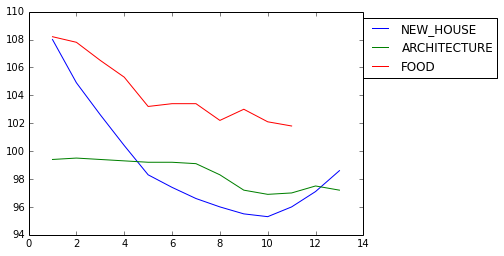

In [133]:
col_list = ["NEW_COMMERCIAL_YOY","INDUSTRY_IN", "FOOD","SEAFOOD","MEAT"]

#three_cities_pdf = three_cities.toPandas()

for col in col_list:
    plt.plot(range(1,14),bk_df[col])
plt.legend(["NEW_HOUSE" ,"INDUSTRY_IN", "FOOD","SEAFOOD","MEAT"], loc='upper center', bbox_to_anchor=(1.2, 1))